# Results visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import laspy
from docx.shared import Cm
from docxtpl import DocxTemplate, InlineImage
from docx.enum.style import WD_STYLE_TYPE
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docxcompose.composer import Composer
from docx import Document as Document_compose
import datetime
import os

In [2]:
QSM_path = '5-QSM_analysed_data/'
geo_path = QSM_path + 'geographic_data/'

## Location of the plot

We will use a slope map as a background.

In [3]:
topography = geo_path + 'slope_90M_n20e120.tif'

These are the given limits of the slope map we want to import.

In [4]:
latmin , latmax = 20 , 25
lonmin , lonmax = 120 , 125

In [5]:
#region we will focus on
refr_latmin , refr_latmax = 23.4 , 24
refr_lonmin , refr_lonmax = 121.2 , 121.8

#more precise location of the forest plot
point = [121.49486 , 23.77719]

Now we import the file and rescale it.

In [6]:
image = cv2.imread(topography,-1)
image = np.asarray(image,dtype = np.float64)
image[image==-9999]=np.nan

cellsize = 5/len(image)

extent = [refr_lonmin , refr_lonmax , refr_latmin , refr_latmax]

#indexes
a = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
b = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
c = int(np.round(abs(refr_latmax-latmax)/cellsize))
d = int(np.round(abs(refr_latmin-latmax)/cellsize))

We also import the subplots information.

In [7]:
subplots_path = geo_path + 'subplots_GPS_coordinates.xlsx'
Subplots = pd.read_excel(subplots_path)

While plotting the subplots precise location, we restrain again our geographic extent.

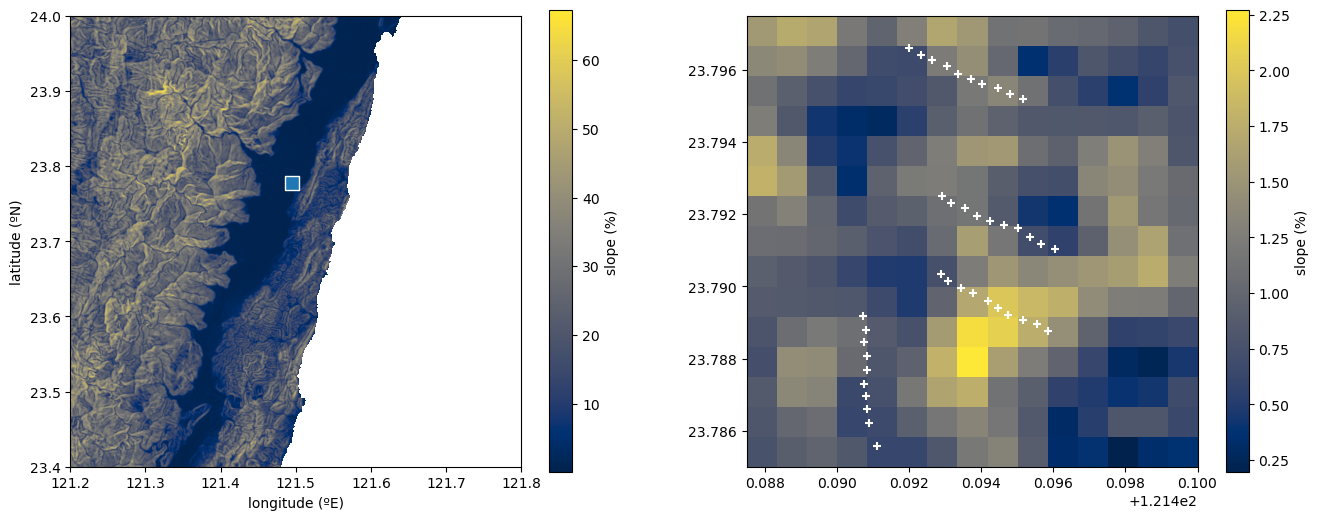

In [8]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(image[c:d,a:b],extent=extent,cmap='cividis')
plt.colorbar(label='slope (%)')
plt.xlabel('longitude (ºE)')
plt.ylabel('latitude (ºN)')
plt.scatter(point[0],point[1],marker=',',s=100,edgecolors='w')

plt.subplot(1,2,2)
refr_latmin , refr_latmax = 23.7850 , 23.7975
refr_lonmin , refr_lonmax = 121.4875 , 121.50
e = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
f = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
g = int(np.round(abs(refr_latmax-latmax)/cellsize))
h = int(np.round(abs(refr_latmin-latmax)/cellsize))
plt.imshow(image[g:h,e:f],extent=[refr_lonmin,refr_lonmax,refr_latmin,refr_latmax],cmap='cividis')
plt.colorbar(label='slope (%)')
plt.scatter(Subplots['longitude'],Subplots['Latitude'],marker='+',c='w')

plt.show()

Now we want to plot a map of the current local climate and its possible evolution in the future.

In [9]:
climate = geo_path + 'Beck_KG_V1/'
climate_present = climate + 'Beck_KG_V1_present_0p0083.tif'
climate_future = climate + 'Beck_KG_V1_future_0p0083.tif'

We import the files.

In [10]:
present = cv2.imread(climate_present)
future = cv2.imread(climate_future)

We rescale our files.

In [11]:
cellsize = 180/len(present)
latmin , latmax = 90 , -90
lonmin , lonmax = -180 , 180

#region we will focus on
refr_latmin , refr_latmax = -23.4 , -24
refr_lonmin , refr_lonmax = 121.2 , 121.8

extent = [refr_lonmin , refr_lonmax , refr_latmin , refr_latmax]

#indexes
a = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
b = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
c = int(np.round(abs(refr_latmax-latmax)/cellsize))
d = int(np.round(abs(refr_latmin-latmax)/cellsize))

point = [121.49486 , -23.77719]

We have to perform this because our file is actually a matrix where RGB have been flipped to BGR.

In [12]:
present = np.fliplr(present.reshape(-1,3)).reshape(present.shape)
future = np.fliplr(future.reshape(-1,3)).reshape(future.shape)

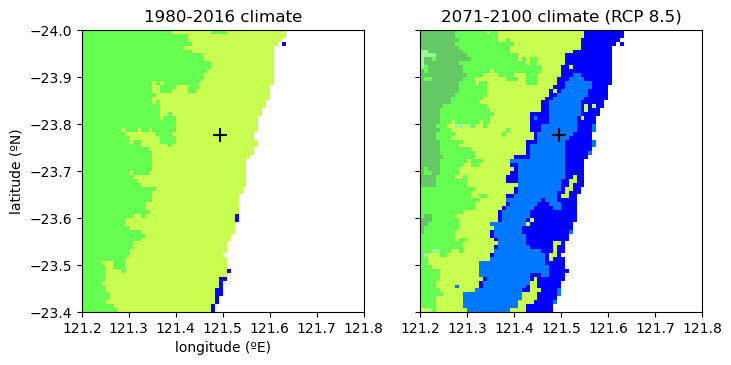

In [13]:
plt.subplots(1,2,sharey=True,figsize=(8,12))

plt.subplot(1,2,1)
plt.title('1980-2016 climate')
plt.imshow(present[c:d,a:b],extent=extent)

plt.xlabel('longitude (ºE)')
plt.ylabel('latitude (ºN)')
plt.scatter(point[0],point[1],marker='+',s=100,c='k')

plt.subplot(1,2,2)
plt.title('2071-2100 climate (RCP 8.5)')
plt.imshow(future[c:d,a:b],extent=extent)
plt.scatter(point[0],point[1],marker='+',s=100,c='k')

plt.show()

Now we focus on the forest cover evolution of our studied area.

In [14]:
refr_latmin , refr_latmax = -23.72 , -23.78
refr_lonmin , refr_lonmax = 121.54 , 121.6

Data import and rescaling for 2015.

In [15]:
latmin , latmax = -22.1605824 , -24.0848729
lonmin , lonmax = 120.1039191 , 122.4964343

extent2015 = [lonmin , lonmax , latmin , latmax]

path_geo_2015 = geo_path + 'GFCC30TC_p117r044_TC_2015/'
geo_2015 = path_geo_2015 + 'p117r044_TC_2015.tif'

image_2015 = cv2.imread(geo_2015)
image_2015 = np.fliplr(image_2015.reshape(-1,3)).reshape(image_2015.shape)
cellsize = 34.7324*180/(np.pi*6370*10**3)

extent = [refr_lonmin , refr_lonmax , refr_latmin , refr_latmax]

#indexes
a = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
b = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
c = int(np.round(abs(refr_latmax-latmax)/cellsize))
d = int(np.round(abs(refr_latmin-latmax)/cellsize))

Same for 2005.

In [16]:
latmin , latmax = -22.1803509 , -24.0609598
lonmin , lonmax = 120.1560074 , 122.3362982

extent2005 = [lonmin , lonmax , latmin , latmax]

path_geo_2005 = geo_path + 'GFCC30TC_p117r044_TC_2005/'
geo_2005 = path_geo_2005 + 'p117r044_TC_2005.tif'

image_2005 = cv2.imread(geo_2005)
image_2005 = np.fliplr(image_2005.reshape(-1,3)).reshape(image_2005.shape)
cellsize = 34.7324*180/(np.pi*6370*10**3)

extent = [refr_lonmin , refr_lonmax , refr_latmin , refr_latmax]

#indexes
e = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
f = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
g = int(np.round(abs(refr_latmax-latmax)/cellsize))
h = int(np.round(abs(refr_latmin-latmax)/cellsize))

And 2000.

In [17]:
latmin , latmax = -22.1803509 , -24.0609598
lonmin , lonmax = 120.1560074 , 122.3362982
extent2000 = [lonmin , lonmax , latmin , latmax]

path_geo_2000 = geo_path + 'GFCC30TC_p117r044_TC_2000/'
geo_2000 = path_geo_2000 + 'p117r044_TC_2000.tif'

image_2000 = cv2.imread(geo_2000)
image_2000 = np.fliplr(image_2000.reshape(-1,3)).reshape(image_2000.shape)
cellsize = 34.7324*180/(np.pi*6370*10**3)

extent = [refr_lonmin , refr_lonmax , refr_latmin , refr_latmax]

#indexes
i = int(np.round(abs(refr_lonmin-lonmin)/cellsize))
j = int(np.round(abs(refr_lonmax-lonmin)/cellsize))
k = int(np.round(abs(refr_latmax-latmax)/cellsize))
l = int(np.round(abs(refr_latmin-latmax)/cellsize))

Caution, the coordinates are too inaccurate to prompt the subplots.

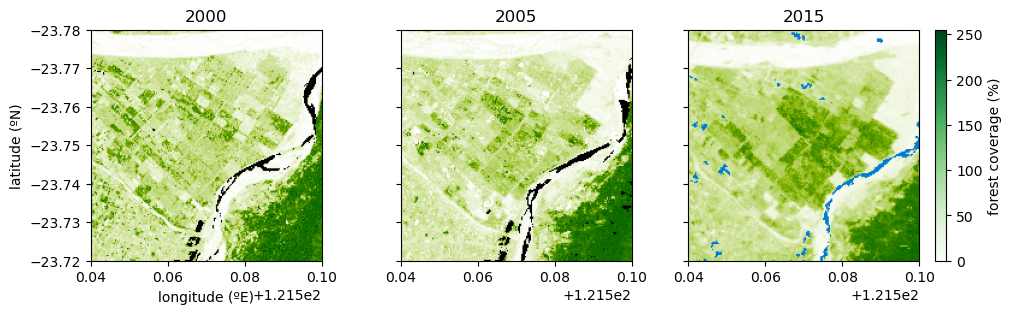

In [18]:
plt.subplots(1,3,sharey=True,figsize=(12,3))
plt.subplots_adjust(wspace=0.0001)

plt.subplot(1,3,1)
plt.title('2000')
plt.imshow(image_2000[k:l,i:j],extent=extent,cmap='Greens')
plt.ylabel('latitude (ºN)')
plt.xlabel('longitude (ºE)')

plt.subplot(1,3,2)
plt.title('2005')
plt.imshow(image_2005[g:h,e:f],extent=extent,cmap='Greens')

plt.subplot(1,3,3)
plt.title('2015')
plt.imshow(image_2015[c:d,a:b],extent=extent,cmap='Greens')
plt.colorbar(label='forest coverage (%)')

plt.show()

## Location of the subplot(s) and tree attributes comparison

In [19]:
on_field_path = QSM_path + 'on_field_data/'
QSM_data_path = QSM_path + 'QSM/'
of_file = on_field_path+'on_field_data.xlsx'
QSM_file = QSM_data_path+'features.xlsx'

In [20]:
on_field_data = pd.read_excel(of_file)
QSM_data =  pd.read_excel(QSM_file)

In [21]:
on_field_data['Height'] = 0
for i in range(len(on_field_data)):
    on_field_data.loc[i,'Height'] = np.cos(0.017*on_field_data.loc[i,'º Leaning'])*on_field_data.loc[i,'Living length (m)']

In [22]:
on_field_data = on_field_data.sort_values('plot').reset_index().drop(columns=['index'])

In [23]:
LiDAR_file = '2023-05-17_08-14-07_10pct_ROI.las'
LiDAR_coords = [121.495364,23.791372]

cloud = laspy.read('2-intensity_filtered_point_cloud/'+LiDAR_file)
scale = cloud.header.scales
X , Y , Z = cloud.X*scale[0] , cloud.Y*scale[1] , cloud.Z*scale[2]
X , Y , Z = X.reshape(len(X),1) , Y.reshape(len(Y),1) , Z.reshape(len(Z),1)
cloud = np.hstack([X,Y,Z])
xmax = cloud[:,0].max()*180/((6.3781*10**6)*np.pi)
xmin = cloud[:,0].min()*180/((6.3781*10**6)*np.pi)
ymax = cloud[:,1].max()*180/((6.3781*10**6)*np.pi)
ymin = cloud[:,1].min()*180/((6.3781*10**6)*np.pi)

surface = np.round((cloud[:,0].max()-cloud[:,0].min())*(cloud[:,1].max()-cloud[:,1].min()))

In [24]:
selection = []
x = []
y = []
for i in range(len(Subplots)):
    if Subplots.loc[i,'longitude']>LiDAR_coords[0]+xmin:
        if Subplots.loc[i,'longitude']<LiDAR_coords[0]+xmax:
            if Subplots.loc[i,'Latitude']>LiDAR_coords[1]+ymin:
                if Subplots.loc[i,'Latitude']<LiDAR_coords[1]+ymax:
                    x.append(Subplots['longitude'][i])
                    y.append(Subplots['Latitude'][i])
                    selection.append(Subplots['TrapName'][i])

In [25]:
date = str(datetime.datetime.now().year)+'-'+str(datetime.datetime.now().month)+'-'+str(datetime.datetime.now().day)
sbplt = str(selection).replace("['",'').replace("']",'').replace(",'",'')

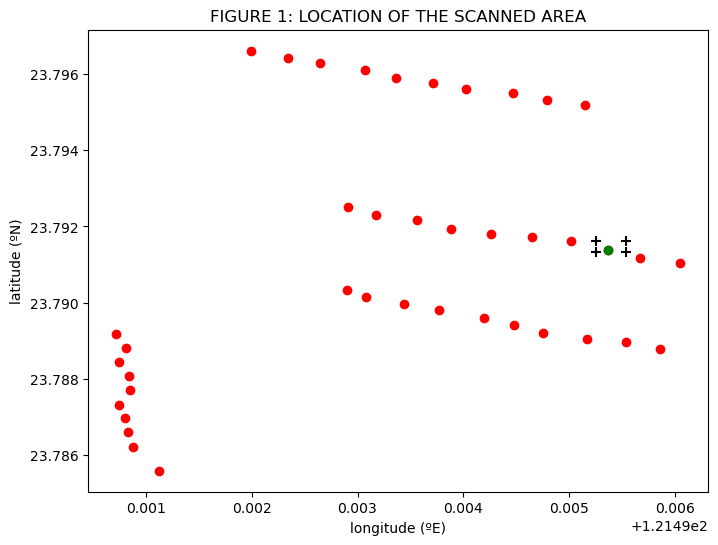

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(Subplots['longitude'],Subplots['Latitude'],c='r')
plt.scatter(x,y,c='g')
plt.scatter(LiDAR_coords[0]+xmin,LiDAR_coords[1]+ymin,marker='+',c='k',s=50)
plt.scatter(LiDAR_coords[0]+xmax,LiDAR_coords[1]+ymin,marker='+',c='k',s=50)
plt.scatter(LiDAR_coords[0]+xmin,LiDAR_coords[1]+ymax,marker='+',c='k',s=50)
plt.scatter(LiDAR_coords[0]+xmax,LiDAR_coords[1]+ymax,marker='+',c='k',s=50)
plt.xlabel('longitude (ºE)')
plt.ylabel('latitude (ºN)')
plt.title('FIGURE 1: LOCATION OF THE SCANNED AREA')

plt.savefig(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig1.png')

plt.show()

In [27]:
subplots = []
for subplot in np.sort(list(set(on_field_data['plot']))):
    subplot_data = on_field_data.loc[on_field_data['plot']==f'{subplot}',:]
    subplots.append(subplot_data)

for subplot in subplots:
    #print(list(set(subplot['plot']))[0])
    #print(int(subplot.describe()['Stem']['count']))
    #print(np.round(subplot.describe()['DBH ']['mean'],1))
    #print(np.round(subplot.describe()['Living length (m)']['mean'],1))
    #print(int(subplot.describe()['º Leaning']['max']))
    i=''
    for length in np.arange(len(list(set(subplot['Sp'])))):
        a = list(set(subplot['Sp']))[length].replace('茄苳','bischofia javanica').replace('大葉桃花心木','swietenia macrophylla').replace('大葉欖仁','terminalia catappa').replace('白雞油','fraxinus griffithii').replace('黑板樹','alstonia scholaris').replace('印度紫檀','pterocarpus indicus').replace('台灣櫸','zelkova serrata')
        if length == len(list(set(subplot['Sp'])))-1:
            i += a
        else:
            i += a +', '
    #print(i)
    
    

In [28]:
subplots = []
for subplot in np.sort(list(set(on_field_data['plot']))):
    if subplot in selection:
        subplot_data = on_field_data.loc[on_field_data['plot']==f'{subplot}',:]
        subplots.append(subplot_data)

species = []
real_DBH = np.array([])
real_H = np.array([])

        
for subplot in subplots:
    real_DBH = np.hstack([real_DBH,subplot['DBH '].values])
    real_H = np.hstack([real_H,subplot['Height'].values])
    for length in np.arange(len(list(set(subplot['Sp'])))):
        a = list(set(subplot['Sp']))[length].replace('茄苳','bischofia javanica').replace('大葉桃花心木','swietenia macrophylla').replace('大葉欖仁','terminalia catappa').replace('白雞油','fraxinus griffithii').replace('黑板樹','alstonia scholaris').replace('印度紫檀','pterocarpus indicus').replace('台灣櫸','zelkova serrata')
        if a not in species:
            species.append(a)
    
    

In [29]:
nb_trees = len(real_DBH)
avDBH = real_DBH.mean()
stdDBH = real_DBH.std()
minDBH = real_DBH.min()
maxDBH = real_DBH.max()
avH = real_H.mean()
stdH = real_H.std()
minH = real_H.min()
maxH = real_H.max()
species = np.array(species)

In [30]:
subplots = []
for subplot in np.sort(list(set(QSM_data['Subplot']))):
    if subplot in selection:
        subplot_data = QSM_data.loc[QSM_data['Subplot']==f'{subplot}',:]
        subplots.append(subplot_data)

DBH , H , AGB , Brown_AGB = np.array([]) , np.array([]) , np.array([]) , np.array([])
        
for subplot in subplots:
    DBH = np.hstack([DBH,subplot['DBH'].values])
    H = np.hstack([H,subplot['height'].values])
    AGB = np.hstack([AGB,subplot['model AGB'].values])
    Brown_AGB = np.hstack([Brown_AGB,subplot["AGB Brown's equation"].values])
    

In [31]:
detected_trees = len(os.listdir('4-separated_trees/not_satisfying')) + len(os.listdir('4-separated_trees/Trees'))
before_QSM_trees = len(os.listdir('4-separated_trees/Trees'))
final_trees = len(DBH)
model_avDBH = DBH.mean()
model_stdDBH = DBH.std()
model_minDBH = DBH.min()
model_maxDBH = DBH.max()
model_avH = H.mean()
model_stdH = H.std()
model_minH = H.min()
model_maxH = H.max()
model_avAGB = AGB.mean()
model_stdAGB = AGB.std()
model_minAGB = AGB.min()
model_maxAGB = AGB.max()
model_totalAGB = AGB.sum()
model_totalSAGB = model_totalAGB/surface
Brown_totalAGB = Brown_AGB.sum()
Brown_avAGB = Brown_AGB.mean()
Brown_stdAGB = Brown_AGB.std()
Brown_minAGB = Brown_AGB.min()
Brown_maxAGB = Brown_AGB.max()

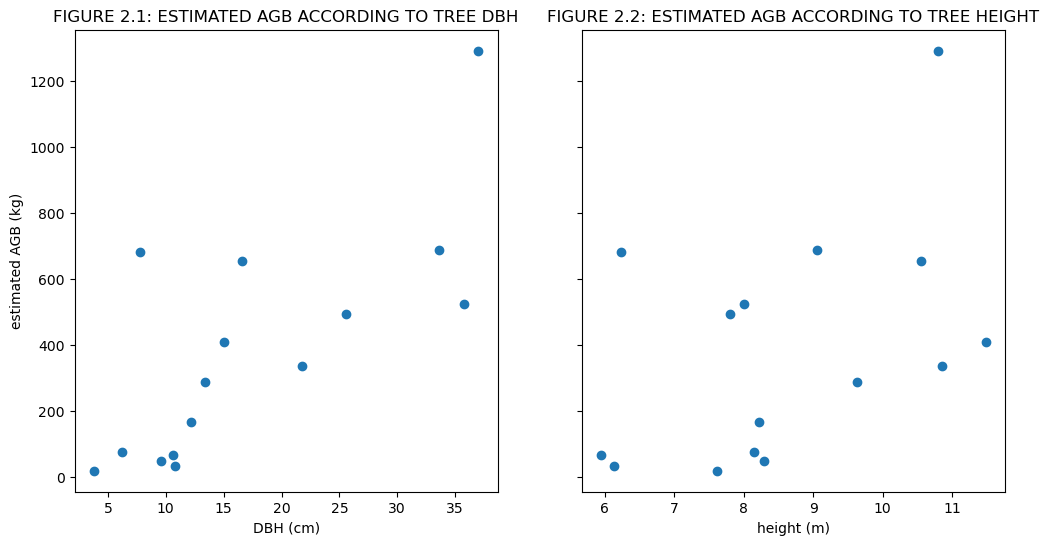

In [32]:
plt.subplots(1,2,sharey=True,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(DBH,AGB)
plt.xlabel('DBH (cm)')
plt.ylabel('estimated AGB (kg)')
plt.title('FIGURE 2.1: ESTIMATED AGB ACCORDING TO TREE DBH')
plt.subplot(1,2,2)
plt.scatter(H,AGB)
plt.xlabel('height (m)')
plt.title('FIGURE 2.2: ESTIMATED AGB ACCORDING TO TREE HEIGHT')
plt.savefig(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig2.png')
plt.show()

In [33]:
files = os.listdir('4-separated_trees/Trees/')
files = np.array(files)
files = files[files!='.DS_Store']
files_names = []
for file in files:
    files_names.append(file[:-4])

trees = []

i = 0

for file_name in files_names:
    
    i += 1
    
    file = files[i-1]
    
    CLOUD = laspy.read('4-separated_trees/Trees/'+file)
    scale = CLOUD.header.scales
    x , y , z = CLOUD.X*scale[0] , CLOUD.Y*scale[1] , CLOUD.Z*scale[2]
    x , y , z = x.reshape(len(x),1) , y.reshape(len(y),1) , z.reshape(len(z),1)
    intensity = CLOUD.intensity.reshape(len(x),1)
    trees.append(np.hstack([x,y,z,intensity]))

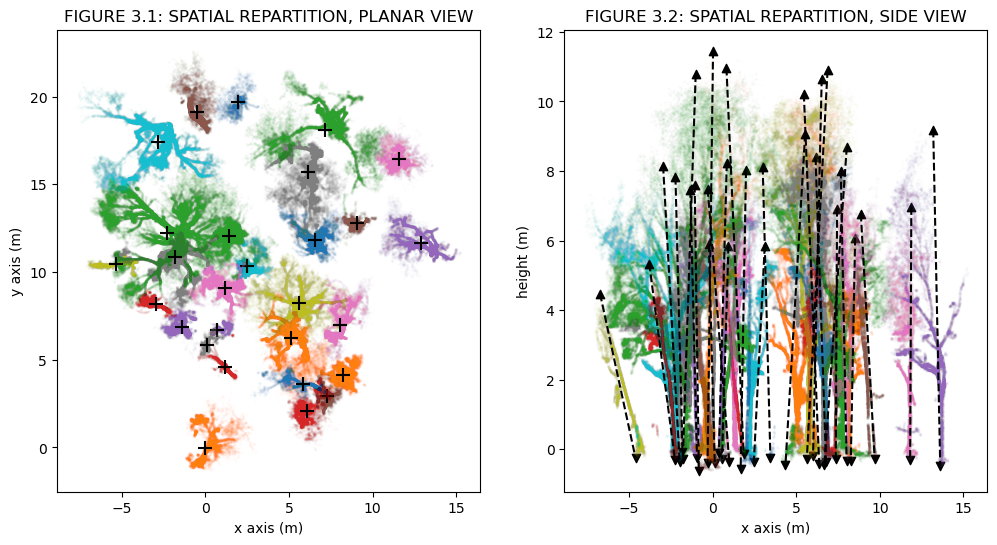

In [34]:
plt.subplots(1,2,figsize=(12,6))
for tree in trees:
    plt.subplot(1,2,1)
    plt.scatter(tree[:,0],tree[:,1],alpha=0.01,s=1)
    plt.scatter(tree[:,:-1].mean(axis=0)[0],tree[:,:-1].mean(axis=0)[1],s=100,c='k',marker='+')
    plt.xlabel('x axis (m)')
    plt.ylabel('y axis (m)')
    plt.title('FIGURE 3.1: SPATIAL REPARTITION, PLANAR VIEW')
    plt.subplot(1,2,2)
    id = tree[:,2].argmax()
    plt.scatter(tree[id,0],tree[id,2],marker='^',c='k')
    id1 = tree[:,2].argmin()
    plt.scatter(tree[id1,0],tree[id1,2],marker='v',c='k')
    plt.scatter(tree[:,0],tree[:,2],alpha=0.01,s=1)
    plt.plot(np.array([tree[id,0],tree[id1,0]]),np.array([tree[id,2],tree[id1,2]]),'--',c='k')
    plt.xlabel('x axis (m)')
    plt.ylabel('height (m)')
    plt.title('FIGURE 3.2: SPATIAL REPARTITION, SIDE VIEW')
plt.savefig(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig3.png')
plt.show()

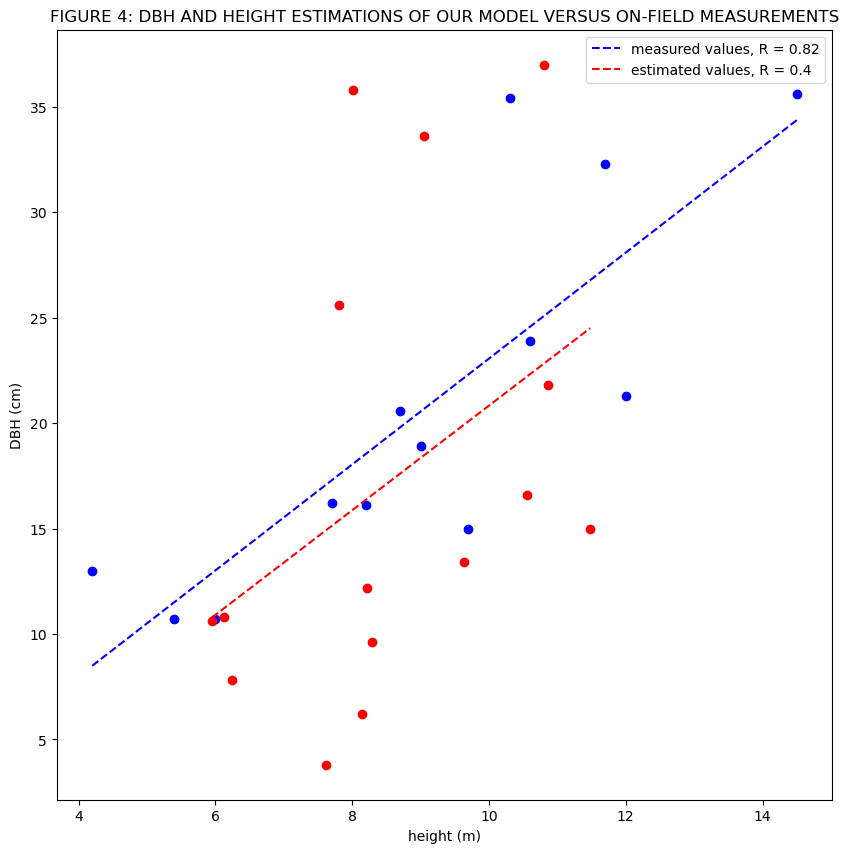

In [35]:
a , b = np.polyfit(real_H,real_DBH,1)
a1 , b1 = np.polyfit(H, DBH,1)
np.corrcoef(DBH,H)
np.corrcoef(real_DBH,real_H)[0,1]
R = np.round(np.corrcoef(DBH,H)[0,1],2)
R_real = np.round(np.corrcoef(real_DBH,real_H)[0,1],2)
plt.figure(figsize=(10,10))
plt.scatter(real_H,real_DBH,c='b')
plt.plot(np.linspace(real_H.min(),real_H.max(),len(real_H)),
         a*np.linspace(real_H.min(),real_H.max(),len(real_H))+b,
         '--',c='b',label=f'measured values, R = {R_real}')
plt.scatter(H,DBH,c='r')
plt.plot(np.linspace(H.min(),H.max(),len(H)),
         a1*np.linspace(H.min(),H.max(),len(H))+b1,
         '--',c='r',label=f'estimated values, R = {R}')
plt.xlabel('height (m)')
plt.ylabel("DBH (cm)")
plt.title('FIGURE 4: DBH AND HEIGHT ESTIMATIONS OF OUR MODEL VERSUS ON-FIELD MEASUREMENTS')
plt.legend()
plt.savefig(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig4.png')
plt.show()

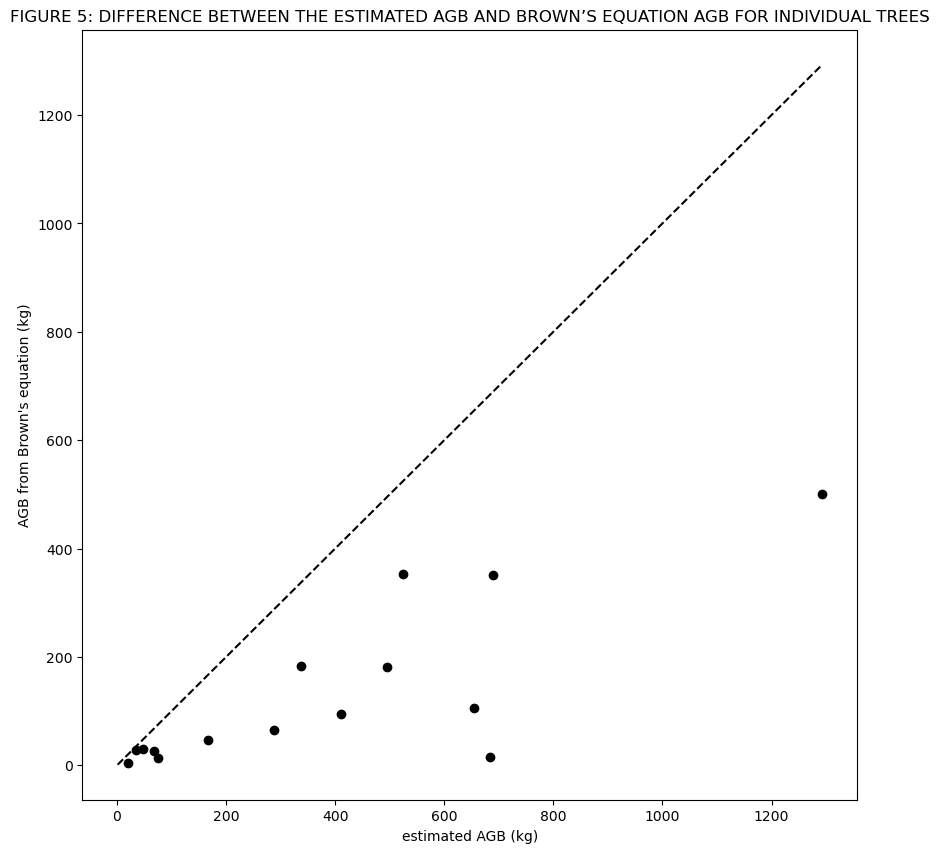

In [36]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(1,max(Brown_maxAGB,model_maxAGB)),np.linspace(1,max(Brown_maxAGB,model_maxAGB)),'--',c='k')
plt.scatter(AGB,Brown_AGB,c='k')
plt.xlabel('estimated AGB (kg)')
plt.ylabel("AGB from Brown's equation (kg)")
plt.title('FIGURE 5: DIFFERENCE BETWEEN THE ESTIMATED AGB AND BROWN’S EQUATION AGB FOR INDIVIDUAL TREES')
plt.savefig(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig5.png')
plt.show()

## Report generator

In [37]:
data = {"date": date,
       "location": str(LiDAR_coords).replace('[','').replace(']','').replace(',','ºE,')+'ºN',
       "subplot": sbplt,
       "x": np.round(cloud[:,0].max()-cloud[:,0].min()),
       "y": np.round(cloud[:,1].max()-cloud[:,1].min()),
       "surface": surface,
       "species": str(species).replace("['",'').replace("']",'').replace(",'",','),
       "real_trees": int(nb_trees),
       "model_trees": int(detected_trees),
       "percentage": np.round(100*detected_trees/nb_trees),
       "before_QSM_trees": int(before_QSM_trees),
       "percentage1": np.round(100*before_QSM_trees/nb_trees),
       "final_trees": int(final_trees),
       "percentage2": np.round(100*final_trees/nb_trees),
       "mDBH": np.round(avDBH,1),
       "mh": np.round(avH,1),
       "std_mDBH": np.round(stdDBH,1),
       "std_mh": np.round(stdH,1),
       "min_mDBH": np.round(minDBH,1),
       "max_mDBH": np.round(maxDBH,1),
       "min_mh": np.round(minH,1),
       "max_mh": np.round(maxH,1),
       "DBH": np.round(model_avDBH,1),
       "h": np.round(model_avH,1),
       "std_DBH": np.round(model_stdDBH,1),
       "std_h": np.round(model_stdH,1),
       "min_DBH": np.round(model_minDBH,1),
       "max_DBH": np.round(model_maxDBH,1),
       "min_h": np.round(model_minH,1),
       "max_h": np.round(model_maxH,1),
       "AGB": np.round(model_totalAGB,1),
       "av_AGB": np.round(model_avAGB,1),
       "std_AGB": np.round(model_stdAGB,1),
       "min_AGB": np.round(model_minAGB,1),
       "max_AGB": np.round(model_maxAGB,1),
       "sAGB": np.round(model_totalSAGB,1),
       "eqAGB": np.round(Brown_totalAGB,1),
       "av_eqAGB": np.round(Brown_avAGB,1),
       "std_eqAGB": np.round(Brown_stdAGB,1),
       "min_eqAGB": np.round(Brown_minAGB,1),
       "max_eqAGB": np.round(Brown_maxAGB,1)}

In [38]:
template = DocxTemplate(QSM_path+'AGB_report_template.docx')
template.render(data)
template.add_picture(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig1.png',width=Cm(8))
last_paragraph = template.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
template.add_picture(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig2.png',width=Cm(16))
last_paragraph = template.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
template.add_picture(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig3.png',width=Cm(16))
last_paragraph = template.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
template.add_picture(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig4.png',width=Cm(10))
last_paragraph = template.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
template.add_picture(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}_fig5.png',width=Cm(10))
last_paragraph = template.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
template.save(f'{QSM_path}/generated_reports/AGB_report_{date}_{sbplt.replace(", ","_")}.docx')

## Selection of multiple scans

In [39]:
selection = ['T2S8','T3S2','T3S4','T3S8']

subplots = []
for subplot in np.sort(list(set(QSM_data['Subplot']))):
    if subplot in selection:
        subplot_data = QSM_data.loc[QSM_data['Subplot']==f'{subplot}',:]
        subplots.append(subplot_data)

DBH , H , AGB , Brown_AGB = np.array([]) , np.array([]) , np.array([]) , np.array([])
        
for subplot in subplots:
    DBH = np.hstack([DBH,subplot['DBH'].values])
    H = np.hstack([H,subplot['height'].values])
    AGB = np.hstack([AGB,subplot['model AGB'].values])
    Brown_AGB = np.hstack([Brown_AGB,subplot["AGB Brown's equation"].values])

subplots = []
for subplot in np.sort(list(set(on_field_data['plot']))):
    if subplot in selection:
        subplot_data = on_field_data.loc[on_field_data['plot']==f'{subplot}',:]
        subplots.append(subplot_data)

real_DBH , real_H = np.array([]) , np.array([])
        
for subplot in subplots:
    real_DBH = np.hstack([real_DBH,subplot['DBH '].values])
    real_H = np.hstack([real_H,subplot['Height'].values])

a , b = np.polyfit(real_H,real_DBH,1)
a1 , b1 = np.polyfit(H, DBH,1)
R = np.round(np.corrcoef(DBH,H)[0,1],2)
R_real = np.round(np.corrcoef(real_DBH,real_H)[0,1],2)

In [40]:
selection = ['T3S2','T3S4']

subplots = []
for subplot in np.sort(list(set(QSM_data['Subplot']))):
    if subplot in selection:
        subplot_data = QSM_data.loc[QSM_data['Subplot']==f'{subplot}',:]
        subplots.append(subplot_data)

DBH2 , H2 = np.array([]) , np.array([])
        
for subplot in subplots:
    DBH2 = np.hstack([DBH2,subplot['DBH'].values])
    H2 = np.hstack([H2,subplot['height'].values])

subplots = []
for subplot in np.sort(list(set(on_field_data['plot']))):
    if subplot in selection:
        subplot_data = on_field_data.loc[on_field_data['plot']==f'{subplot}',:]
        subplots.append(subplot_data)

real_DBH2 , real_H2 = np.array([]) , np.array([])
        
for subplot in subplots:
    real_DBH2 = np.hstack([real_DBH2,subplot['DBH '].values])
    real_H2 = np.hstack([real_H2,subplot['Height'].values])

a4 , b4 = np.polyfit(real_H2,real_DBH2,1)
a5 , b5 = np.polyfit(H2, DBH2,1)
R2 = np.round(np.corrcoef(DBH2,H2)[0,1],2)
R_real2 = np.round(np.corrcoef(real_DBH2,real_H2)[0,1],2)

In [41]:
selection = ['T2S8','T3S8']

subplots = []
for subplot in np.sort(list(set(QSM_data['Subplot']))):
    if subplot in selection:
        subplot_data = QSM_data.loc[QSM_data['Subplot']==f'{subplot}',:]
        subplots.append(subplot_data)

DBH1 , H1 = np.array([]) , np.array([])
        
for subplot in subplots:
    DBH1 = np.hstack([DBH1,subplot['DBH'].values])
    H1 = np.hstack([H1,subplot['height'].values])

subplots = []
for subplot in np.sort(list(set(on_field_data['plot']))):
    if subplot in selection:
        subplot_data = on_field_data.loc[on_field_data['plot']==f'{subplot}',:]
        subplots.append(subplot_data)

real_DBH1 , real_H1 = np.array([]) , np.array([])
        
for subplot in subplots:
    real_DBH1 = np.hstack([real_DBH1,subplot['DBH '].values])
    real_H1 = np.hstack([real_H1,subplot['Height'].values])

a2 , b2 = np.polyfit(real_H1,real_DBH1,1)
a3 , b3 = np.polyfit(H1, DBH1,1)
R1 = np.round(np.corrcoef(DBH1,H1)[0,1],2)
R_real1 = np.round(np.corrcoef(real_DBH1,real_H1)[0,1],2)

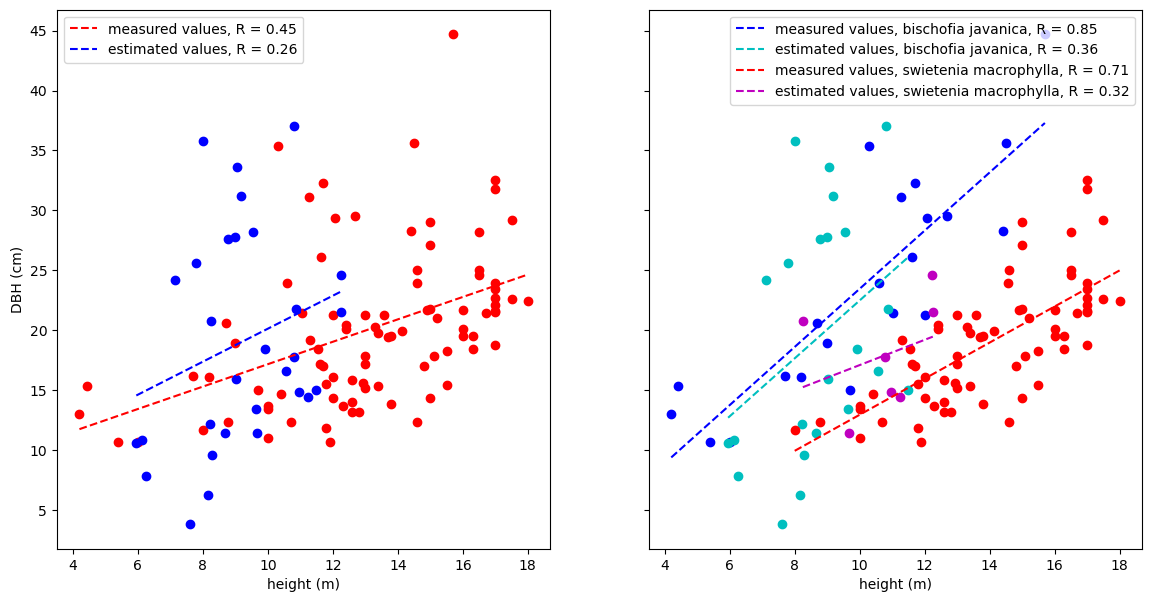

In [42]:
plt.subplots(1,2,figsize=(14,7),sharey=True)

plt.subplot(1,2,1)
plt.scatter(real_H,real_DBH,c='r')
plt.plot(np.linspace(real_H.min(),real_H.max(),len(real_H)),
         a*np.linspace(real_H.min(),real_H.max(),len(real_H))+b,
         '--',c='r',label=f'measured values, R = {R_real}')
plt.scatter(H,DBH,c='b')
plt.plot(np.linspace(H.min(),H.max(),len(H)),
         a1*np.linspace(H.min(),H.max(),len(H))+b1,
         '--',c='b',label=f'estimated values, R = {R}')
plt.xlabel('height (m)')
plt.ylabel("DBH (cm)")
plt.legend()


plt.subplot(1,2,2)

plt.scatter(real_H1,real_DBH1,c='b')
plt.plot(np.linspace(real_H1.min(),real_H1.max(),len(real_H1)),
         a2*np.linspace(real_H1.min(),real_H1.max(),len(real_H1))+b2,
         '--',c='b',label=f'measured values, bischofia javanica, R = {R_real1}')
plt.scatter(H1,DBH1,c='c')
plt.plot(np.linspace(H1.min(),H1.max(),len(H1)),
         a3*np.linspace(H1.min(),H1.max(),len(H1))+b3,
         '--',c='c',label=f'estimated values, bischofia javanica, R = {R1}')

plt.scatter(real_H2,real_DBH2,c='r')
plt.plot(np.linspace(real_H2.min(),real_H2.max(),len(real_H2)),
         a4*np.linspace(real_H2.min(),real_H2.max(),len(real_H2))+b4,
         '--',c='r',label=f'measured values, swietenia macrophylla, R = {R_real2}')
plt.scatter(H2,DBH2,c='m')
plt.plot(np.linspace(H2.min(),H2.max(),len(H2)),
         a5*np.linspace(H2.min(),H2.max(),len(H2))+b5,
         '--',c='m',label=f'estimated values, swietenia macrophylla, R = {R2}')

plt.xlabel('height (m)')

plt.legend()
plt.show()

In [43]:
model_maxAGB = AGB.max()
Brown_maxAGB = Brown_AGB.max()

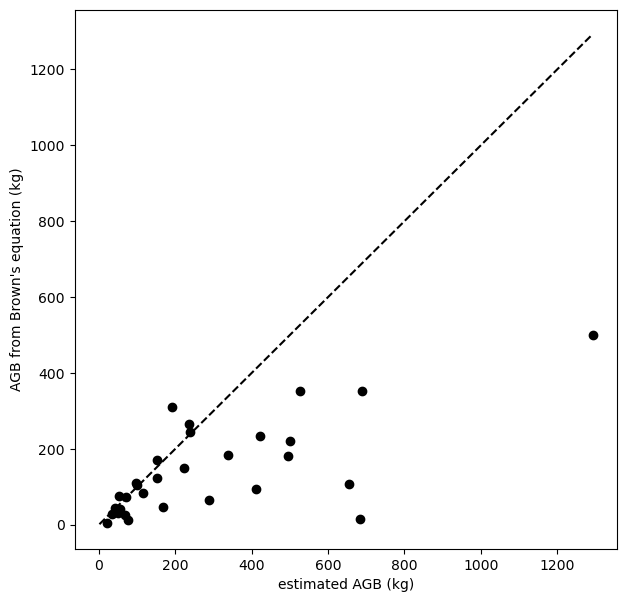

In [44]:
plt.figure(figsize=(7,7))
plt.plot(np.linspace(1,max(Brown_maxAGB,model_maxAGB)),np.linspace(1,max(Brown_maxAGB,model_maxAGB)),'--',c='k')
plt.scatter(AGB,Brown_AGB,c='k')
plt.xlabel('estimated AGB (kg)')
plt.ylabel("AGB from Brown's equation (kg)")
plt.show()